In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [6]:
game_sales = pd.read_csv('game_sales.csv', index_col = 0)
metacritic_reviews = pd.read_csv('metacritic_reviews.csv', index_col = 0)
gamespot_reviews = pd.read_csv('gamespot_reviews.csv', index_col = 0)
gamespot_w_sales = pd.read_csv('gamespot_w_sales.csv', index_col = 0)
metacritic_w_sales = pd.read_csv('metacritic_w_sales.csv', index_col = 0)


In [7]:
box_office_video_game_movies = pd.read_csv('box_office_video_game_movies.csv', index_col = 0)

In [8]:
# metacritic_wo_0 = metacritic_w_sales.loc[metacritic_w_sales['Global'] > 0]

In [9]:
metacritic_w_sales.head()

,Game,metacritic_score,metacritic_review_count,user_score,user_review_count,content_rating,genres,release_year,Publisher,global_unit_sales,Action/Adventure,RPG,Open-World,Shooter,Racing,Sci-fi
0,Red Dead Redemption 2,97,33,7.7,2413.0,M,"['Action Adventure', ' Open-World']",2018,Rockstar Games,5.77,1,0,1,0,0,0
1,Metal Gear Solid V The Phantom Pain,95,10,7.4,1111.0,M,"['Modern', ' Modern', ' Action Adventure', ' O...",2015,Konami Digital Entertainment,0.83,1,0,1,0,0,0
2,Inside,93,87,8.3,629.0,M,"['Action', ' Platformer', ' 2D']",2016,NaN,0.00,1,0,0,0,0,0
3,The Witcher 3 Wild Hunt,91,13,9.2,4585.0,M,"['Action RPG', ' Role-Playing', ' Action RPG']",2015,Namco Bandai Games,1.74,1,1,0,0,0,0
4,Rayman Legends,91,6,7.9,243.0,E10+,"['Platformer', ' 2D', ' Action', ' Platformer'...",2014,Ubisoft,0.38,1,0,0,0,0,0


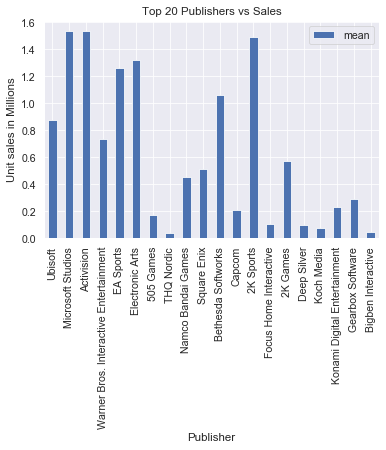

In [10]:
# plot one - publisher by gobal sales

publisher_sales = metacritic_w_sales.groupby('Publisher')['global_unit_sales'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Unit sales in Millions')
ax.set_xlabel('Publisher')
ax.set_title('Top 20 Publishers vs Sales')

plt.savefig('.png')

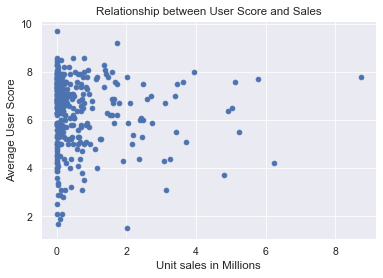

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['user_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average User Score")
ax.set_title('Relationship between User Score and Sales')


plt.show()

plt.savefig('.png')

In [12]:
metacritic_w_sales[['global_unit_sales', 'user_score']].corr()

,global_unit_sales,user_score
global_unit_sales,1.000000,-0.047529
user_score,-0.047529,1.000000


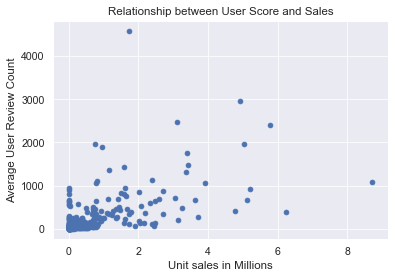

In [13]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['user_review_count'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average User Review Count")
ax.set_title('Relationship between User Score and Sales')


plt.show()

In [14]:
metacritic_w_sales[['global_unit_sales', 'user_review_count']].corr()

,global_unit_sales,user_review_count
global_unit_sales,1.00000,0.57943
user_review_count,0.57943,1.00000


In [15]:
# based on the graphs above we came to the following conclusions

# for the publishers bar chart we saw that the 20 most popular publishers had no real correlation
# to the sales of their games. Some sold well and others didnt

# for the 2 scatter plots we saw that the amount of users who reviewed the game heavily correlated
# to sales for the game whereas the actual rating those users gave it had much less correlation

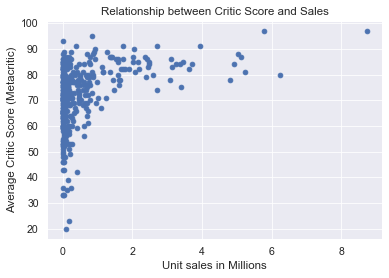

In [16]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['metacritic_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (Metacritic)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [17]:
metacritic_w_sales[['global_unit_sales', 'metacritic_score']].corr()

,global_unit_sales,metacritic_score
global_unit_sales,1.000000,0.399818
metacritic_score,0.399818,1.000000


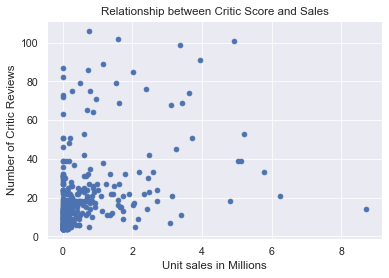

In [18]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_sales['global_unit_sales'], metacritic_w_sales['metacritic_review_count'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Number of Critic Reviews")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [19]:
metacritic_w_sales[['global_unit_sales', 'metacritic_review_count']].corr()

,global_unit_sales,metacritic_review_count
global_unit_sales,1.000000,0.368551
metacritic_review_count,0.368551,1.000000


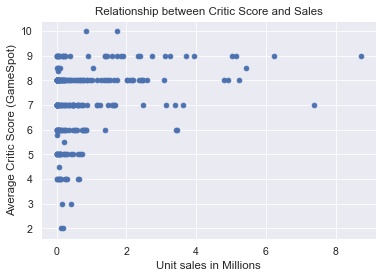

In [20]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(gamespot_w_sales['global_unit_sales'], gamespot_w_sales['score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (GameSpot)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [21]:
gamespot_w_sales[['global_unit_sales', 'score']].corr()

,global_unit_sales,score
global_unit_sales,1.000000,0.298152
score,0.298152,1.000000


In [22]:
metacritic_w_users = metacritic_w_sales.loc[metacritic_w_sales['user_review_count'] > 10]

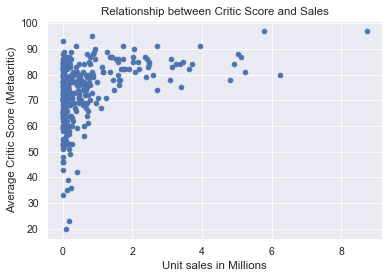

In [23]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(metacritic_w_users['global_unit_sales'], metacritic_w_users['metacritic_score'])

ax.set_xlabel("Unit sales in Millions")
ax.set_ylabel("Average Critic Score (Metacritic)")
ax.set_title('Relationship between Critic Score and Sales')


plt.show()

In [24]:
gamespot_w_sales[['global_unit_sales', 'score']].corr()

,global_unit_sales,score
global_unit_sales,1.000000,0.298152
score,0.298152,1.000000


In [25]:
# Above we got the correlation and scatter plot for the user review count and the total sales globally


# we found that all 3 had some correletion, betweeen .29 and .39 which is good but lower than the
# correlation with the user review count


# we also checked the user score only gor games with at least 5 reviews as an attempt to try and
# not skew the data with scores that have only 1 review and it was still lower than critic scores

In [26]:
# going forward we will sort by review count, find the most popular games by the review count 
# which could tell us which game could be turned into a movie

In [27]:
top_20_games_by_sales = metacritic_w_sales.sort_values('global_unit_sales', ascending = False).head(20)

Text(0.5, 1.0, 'Review Count for Top 20 Games Sold')

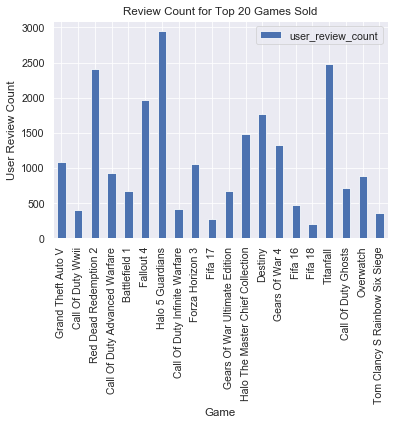

In [28]:

ax = top_20_games_by_sales.plot.bar(x = 'Game', y = 'user_review_count')
ax.set_ylabel('User Review Count')
ax.set_xlabel('Game')
ax.set_title('Review Count for Top 20 Games Sold')

In [29]:
# based on the top 20 games sold most had a lot of reviews and the ones that didnt
# like fifa are games that have new releases every year

Text(0.5, 1.0, 'Sales by Content Rating')

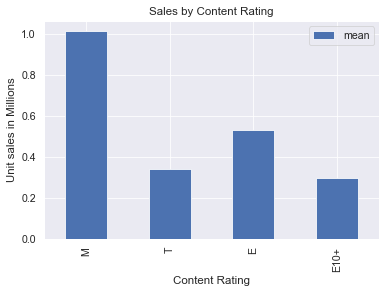

In [30]:
publisher_sales = metacritic_w_sales.groupby('content_rating')['global_unit_sales'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Unit sales in Millions')
ax.set_xlabel('Content Rating')
ax.set_title('Sales by Content Rating')

Text(0.5, 1.0, 'User Review Count by Content Rating')

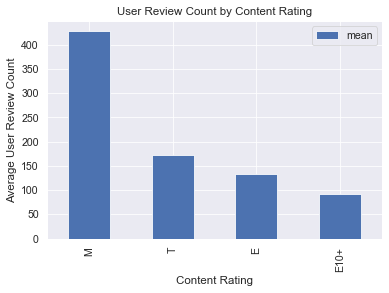

In [31]:
publisher_sales = metacritic_w_sales.groupby('content_rating')['user_review_count'].describe().sort_values('count', ascending = False)[0:20]    

ax = publisher_sales.plot.bar(y = 'mean')
ax.set_ylabel('Average User Review Count')
ax.set_xlabel('Content Rating')
ax.set_title('User Review Count by Content Rating')

In [32]:
# Based on the graphs above the best selling and most reviewed games are Mature games by a large margin    

In [33]:
box_office_video_game_movies.describe()

,Release date,Worldwide box office
count,38.000000,3.800000e+01
mean,2007.710526,1.360747e+08
std,7.522607,1.379859e+08
min,1993.000000,9.232100e+04
25%,2003.250000,1.284763e+07
50%,2007.500000,9.851549e+07
75%,2013.500000,2.404201e+08
max,2020.000000,4.390489e+08


In [34]:
box_office_video_game_movies.sort_values('Worldwide box office').head()

,Title,Release date,Worldwide box office,Distributor,Original game publisher
35,Dead Trigger,2019,92321,Saban Films,Madfinger Games
17,Postal,2007,146741,Vivendi Entertainment,Ripcord Games
20,Far Cry,2008,743634,20th Century Fox,Ubisoft
23,Tekken,2010,967369,Warner Bros. Pictures,Bandai Namco Games
1,Double Dragon,1994,2341309,Gramercy Pictures,Technōs Japan


In [35]:
movies_after_2012 = box_office_video_game_movies.loc[box_office_video_game_movies['Release date'] >= 2013].sort_values('Worldwide box office', ascending = False)    
movies_after_2012['Worldwide box office'] = [x/1000000 for x in movies_after_2012['Worldwide box office']]

In [36]:
# Live Action movies on average made $136 million

# all but 4 of 37 movies made $2.3 million or more

# of the 10 live action video game movies only 2 made less than $200 million

# the only movie that did really poorly was dead trigger which was an android/ios game

# as in the graph below the only other movie that made less than @200 million was hitman 
# but it still did fairly well overall despite being seen as a very bad movie 
# (avg score of 31 as per rottentomatoes, imdb and metacritic)

# movies like warcraft also did poorly in ratings and made a lot of money

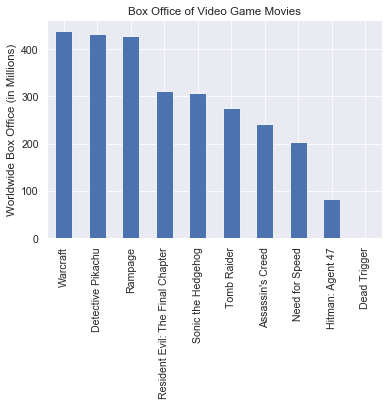

In [37]:
ax2 = movies_after_2012.groupby('Title')['Worldwide box office'].sum().sort_values(ascending = False).plot(kind = 'bar', title = 'Box Office of Video Game Movies')
ax2.set_ylabel('Worldwide Box Office (in Millions)')
ax2.set_xlabel('')

plt.savefig('Box_office_video_game_movies.png')